<a href="https://colab.research.google.com/github/Tamtu55/NLPandemicTracker/blob/main/Covid_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="tamanna240205"
os.environ["KAGGLE_KEY"]="79c2488b01357b7f2a7ae77eed0f518d"
!kaggle datasets download datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 167MB/s]


In [ ]:
!unzip /content/covid-19-nlp-text-classification.zip

Archive:  /content/covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing libraries
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

#ML Model Building Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv('/content/Corona_NLP_train.csv',encoding='latin-1')
df.head()
test=pd.read_csv('/content/Corona_NLP_test.csv',encoding='latin-1')

In [ ]:
df.shape

(41157, 6)

Data Cleaning and EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

In [ ]:
#Check for nulls
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
#Check for duplicates
df.duplicated().sum()

0

In [ ]:
#Data is clean
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

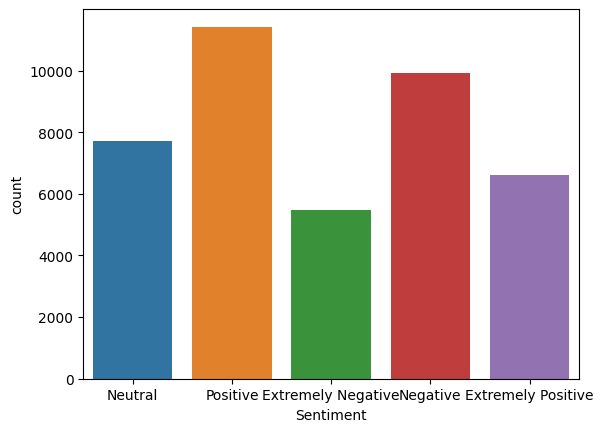

In [ ]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [ ]:
#Now we will classify the sentiments in only 3 categories.

def categorize_sentiment(score):
    if score == 'Negative':
        return "Negative"
    elif score == 'Extremely Negative':
        return "Negative"
    elif score == 'Positive':
        return "Positive"
    elif score == 'Extremely Positive':
        return "Positive"
    else:
        return "Neutral"
df['Sentiment'] = df['Sentiment']

In [ ]:
df['Sentiment'] = df['Sentiment'].apply(categorize_sentiment)
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


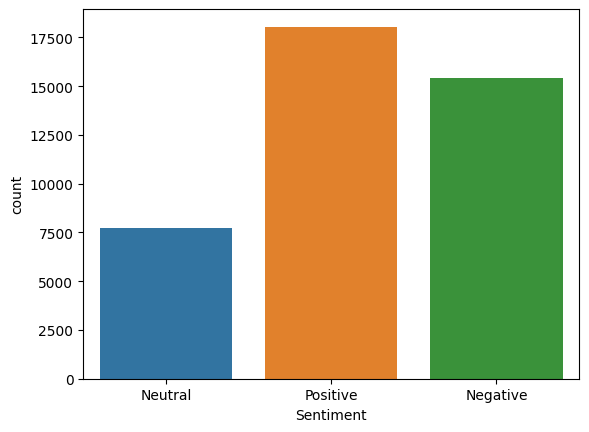

In [ ]:
sns.countplot(x=df['Sentiment'])
plt.show()

Text Preprocessing

In [ ]:
#Let's make a function to preprocess the text
stemmer = PorterStemmer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower().split()

    #Remove punctuations
    text = [word.translate(str.maketrans('', '', string.punctuation)) for word in text]

    #Remove Stopwords
    text = [word for word in text if word not in stop_words]

    #Stemming
    text = [stemmer.stem(word) for word in text]

    #Joining the text
    joined = ' '.join(text)
    return joined


In [ ]:
df['text'] = df['OriginalTweet'].apply(clean_text)
df.head()

,OriginalTweet,Sentiment,text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Negative,readi go supermarket covid19 outbreak im paran...


Word Cloud

In [ ]:
all_words = ' '.join(word for word in df['text'])

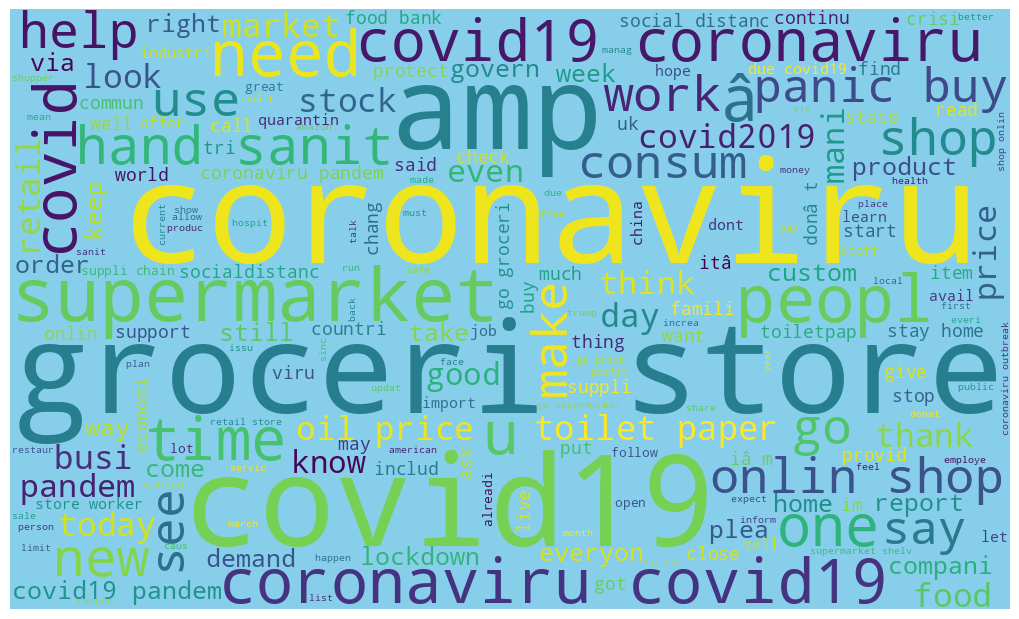

In [ ]:
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'skyblue',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

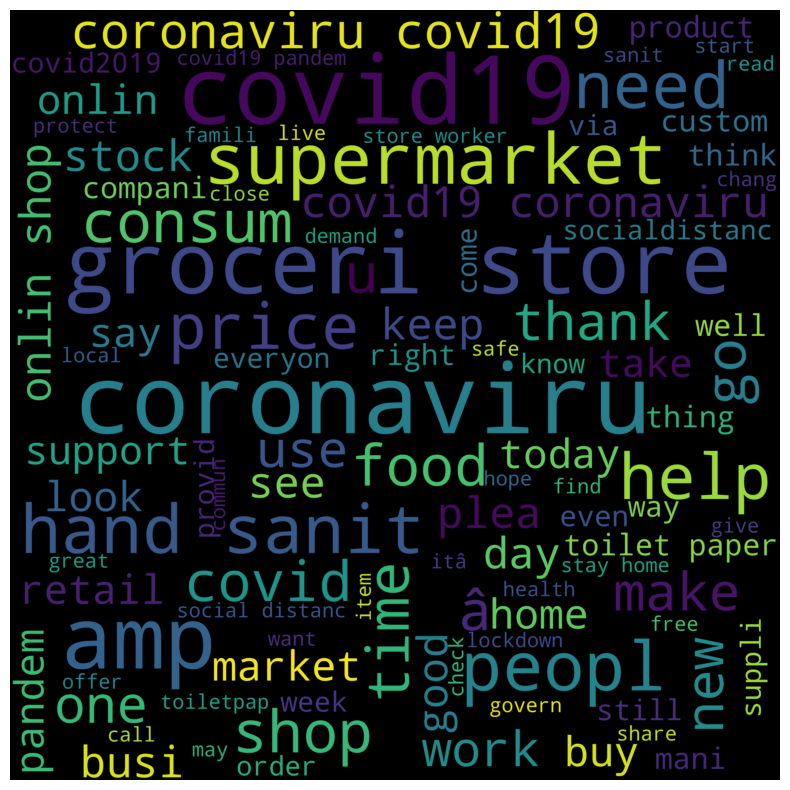

In [ ]:
word_cloud_text = ''.join(df[df["Sentiment"]=="Positive"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

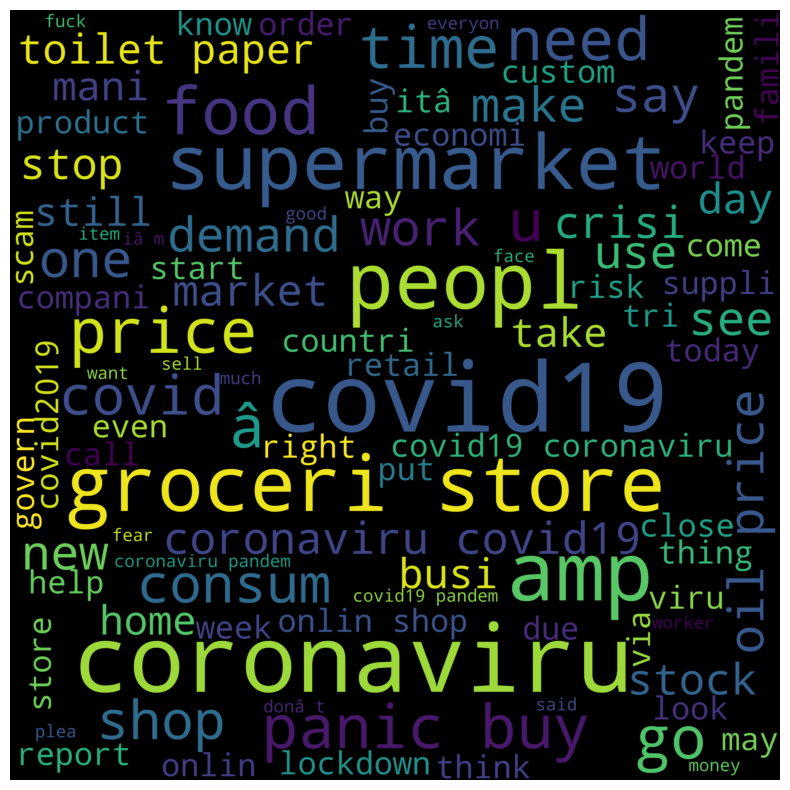

In [ ]:
word_cloud_text = ''.join(df[df["Sentiment"]=="Negative"].text)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in df.text]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of tokens:  76389


In [ ]:
tokens_text[1]

['advic',
 'talk',
 'neighbour',
 'famili',
 'exchang',
 'phone',
 'number',
 'creat',
 'contact',
 'list',
 'phone',
 'number',
 'neighbour',
 'school',
 'employ',
 'chemist',
 'gp',
 'set',
 'onlin',
 'shop',
 'account',
 'poss',
 'adequ',
 'suppli',
 'regular',
 'med',
 'order']

In [ ]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]


['i', 'me', 'my', 'myself', 'we']

In [ ]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df, test_size=0.2, random_state=0)


In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.text)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.text)

In [ ]:
X_test_bow

<8232x64347 sparse matrix of type '<class 'numpy.int64'>'
	with 137530 stored elements in Compressed Sparse Row format>

In [ ]:
#Labels for train and test encoding
y_train_bow = reviews_train['Sentiment']
y_test_bow = reviews_test['Sentiment']

In [ ]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]


Positive    0.440476
Negative    0.374150
Neutral     0.185374
Name: Sentiment, dtype: float64

In [ ]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  79.74975704567542


In [ ]:
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)


In [ ]:
%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)
XGB.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred_2 = XGB.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred_2) * 100)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Accuracy:  81.19533527696792


In [ ]:
test_pred_N = XGB.predict(X_train_bow)
print("Accuracy: ", accuracy_score(y_train_bow_num, test_pred_N) * 100)

Accuracy:  94.25968109339408


Hyperparameter tuning


In [ ]:
# function for fitting tuning and result generation:

def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(max_iter=10000),{'penalty': ['l1','l2'],'solver': ['liblinear']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7]}),
        'Naive Bayes':(MultinomialNB(),{'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True,False]}),
        'SVM':(LinearSVC(max_iter=10000),{'C': [0.1, 1.0, 10.0], 'penalty':['l1','l2']}),
#         'Decision Tree':(DecisionTreeClassifier(),{'criterion': ['gini','entropy'], 'splitter':['best','random']})
    }

    results=[]

    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)

        print(f"Tuning for {name}")

        st=time.time()

        grid.fit(x_train,y_train) # fitting in GridSearchCV
        y_pred=grid.predict(x_test) # predicts using best hyperparameters
        acc=accuracy_score(y_test,y_pred) # best accuracy obtained

        en=time.time()

        net_time=en-st

        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")

        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()

    result_df=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    result_df=result_df.style.highlight_max(subset=['best_test_score'], color = 'green')
    result_df=result_df.highlight_min(subset=['best_test_score'], color = 'red')
    result_df=result_df.highlight_max(subset=['running_time'], color = 'red')
    result_df=result_df.highlight_min(subset=['running_time'], color = 'green')
    return result_df

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

Corona=pd.read_csv("/content/Corona_NLP_train.csv",encoding='latin1')

Corona.Sentiment.replace(to_replace='Extremely Positive', value='Positive',inplace=True)
Corona.Sentiment.replace(to_replace='Extremely Negative', value='Negative',inplace=True)
print(Corona.Sentiment.value_counts())
Corona = Corona[['OriginalTweet','Sentiment']]
Corona.head(10)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
import re
import string
stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub("@\S+", " ", text)
    # remove url
    text = re.sub("https*\S+", " ", text)
    # remove hashtags
    text = re.sub("#\S+", " ", text)
    # remove all numbers
    text = re.sub("\d", " ", text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    # stopwords
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [ ]:
Corona.OriginalTweet=Corona.OriginalTweet.apply(clean_text)

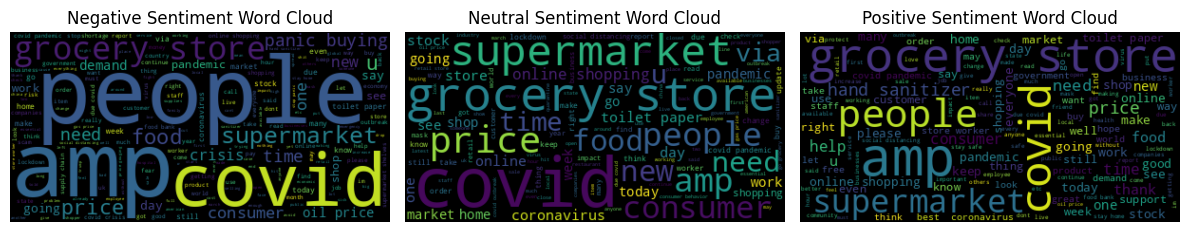

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_text = ' '.join(Corona[Corona.Sentiment == 'Negative'].OriginalTweet.tolist())
neutral_text = ' '.join(Corona[Corona.Sentiment == 'Neutral'].OriginalTweet.tolist())
positive_text = ' '.join(Corona[Corona.Sentiment == 'Positive'].OriginalTweet.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidf=TfidfVectorizer()
X_transformed=tfidf.fit_transform(Corona.OriginalTweet)
X_transformed

X_train, X_test, y_train, y_test = train_test_split(X_transformed, Corona.Sentiment, test_size=0.2)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted)
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))

accuracy score 0.8066083576287658
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81      3066
     Neutral       0.76      0.65      0.70      1565
    Positive       0.82      0.86      0.84      3601

    accuracy                           0.81      8232
   macro avg       0.80      0.78      0.79      8232
weighted avg       0.80      0.81      0.80      8232



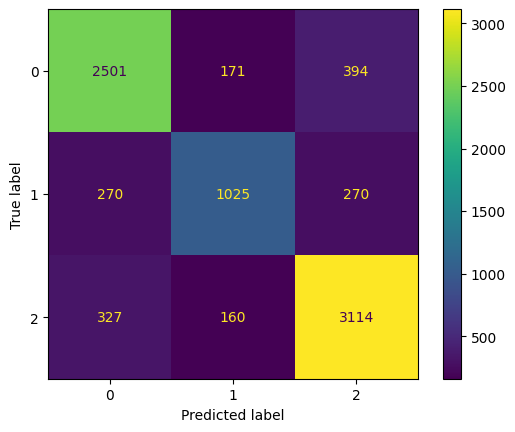

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)

accuracy score 0.8066083576287658
              precision    recall  f1-score   support

    Negative       0.81      0.82      0.81      3066
     Neutral       0.76      0.65      0.70      1565
    Positive       0.82      0.86      0.84      3601

    accuracy                           0.81      8232
   macro avg       0.80      0.78      0.79      8232
weighted avg       0.80      0.81      0.80      8232



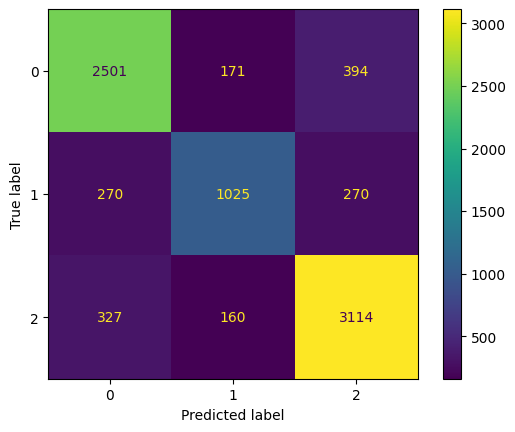

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)

accuracy score 0.6596209912536443
              precision    recall  f1-score   support

    Negative       0.69      0.70      0.70      3066
     Neutral       0.69      0.16      0.26      1565
    Positive       0.64      0.84      0.72      3601

    accuracy                           0.66      8232
   macro avg       0.67      0.57      0.56      8232
weighted avg       0.67      0.66      0.63      8232



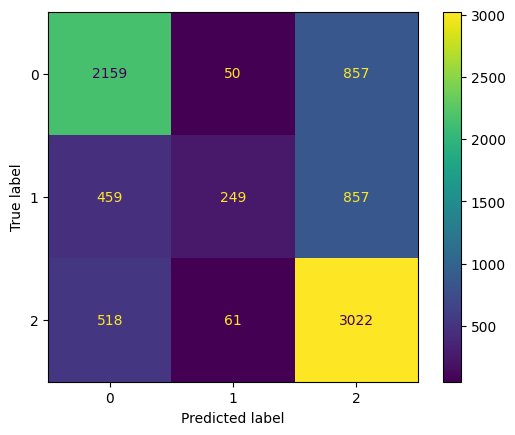

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.25)
nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

eval_model(y_test, nb_y_pred)